<a href="https://colab.research.google.com/github/KryssyCo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Krista_Shepard_DS5_Assignment_2_Loading_Data_from_a_Variety_of_Sources.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

In [0]:
agesOfPeopleInLambdaSchool = [25, 37, 60, 82, 3]

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.php
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [36]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [38]:
# Step 3 - verify we've got *something*
print(flag_data.shape)
flag_data.head()

(193, 30)


,Afghanistan,5,1,648,16,10,2,0,3,5.1,1.1,1.2,0.1,1.3,1.4,1.5,0.2,green,0.3,0.4,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black


In [39]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [40]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  46042      0 --:--:-- --:--:-- --:--:-- 46042
    194     194   15240


In [41]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names

1. TItle: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America,

In [42]:
column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
           'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 
           'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 
           'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 
           'animate', 'text', 'topleft', 'botright']

flag_data = pd.read_csv(flag_data_url, names=column_headers)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [43]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

# pd.read_csv()

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [0]:
pd.set_option('display.max_columns', 500)

In [47]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [48]:
column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
           'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 
           'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 
           'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 
           'animate', 'text', 'topleft', 'botright']

flag_data = pd.read_csv(flag_data_url, names=column_headers)
flag_data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [49]:
flag_data.count()

name          194
landmass      194
zone          194
area          194
population    194
language      194
religion      194
bars          194
stripes       194
colors        194
red           194
green         194
blue          194
gold          194
white         194
black         194
orange        194
mainhue       194
circles       194
crosses       194
saltires      194
quarters      194
sunstars      194
crescent      194
triangle      194
icon          194
animate       194
text          194
topleft       194
botright      194
dtype: int64

In [50]:
flag_data.isna().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colors        0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

## Loading from a local CSV to Google Colab

In [51]:
from google.colab import files
uploaded = files.upload()

In [52]:
df = pd.read_csv('flag (3).data', names=column_headers)
df.head()

FileNotFoundError: ignored

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
titanic.head()

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

In [0]:
# Scatter Plot

flag_data.plot.scatter('population', 'area');

In [0]:
# Histogram
flag_data.area.hist(bins=20);

In [0]:
# Density Plot

flag_data.population.plot.density();

In [0]:
flag_data.area.plot.density();

In [0]:
# Seaborn Pairplot
import seaborn as sns

sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(flag_data)

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [0]:
df = pd.read_csv('https://github.com/ryanleeallred/datasets/raw/master/adult.csv')
print(df.shape)
df.head()

In [0]:
df.isnull().sum()

In [0]:
df.dtypes

In [0]:
df.describe()

In [0]:
import numpy as np
df.describe(exclude=[np.number])

In [0]:
df.country.value_counts()

# Lets try the Adult Dataset

In [0]:
# Treat the word 'Bachelors' as our missing value indicator

# Treating "Bachelors" as NaN doesn't do anything (although our syntax is correct)
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values='Bachelors')

df.head()

In [0]:
df.education.loc[0]

In [0]:
# Treat the word 'Bachelors' as our missing value indicator

# Treating "Bachelors" as NaN doesn't do anything (although our syntax is correct)
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' Bachelors')

df.head()

In [0]:
# treat ' ?' as the missing value indicator
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')

df.head(20)

In [0]:
df.isnull().sum()

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

This data set was obtained from UCI. It was populated by crawling TripAdvisor.com. 

Reviews on destinations in 10 categories mentioned across East Asia are considered.

- Each traveler rating is mapped as:

- Excellent (4)

- Very Good (3) 
- Average (2)
- Poor (1)
- Terrible (0) 

The average rating is used against each category per user.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [91]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv
#This gives raw data vs. a table as you can see below. The diffence between using one method is quite apparent. 

User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
User 1,0.93,1.8,2.29,0.62,0.8,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.8,1.31,2.5
User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
User 6,0.99,1.28,0.72,0.27,0.74,1.26,3.17,2.89,1.66,3.66
User 7,0.9,1.36,0.26,0.32,0.86,1.58,3.17,2.66,1.22,3.22
User 8,0.74,1.4,0.22,0.41,0.82,1.5,3.17,2.81,1.54,2.88
User 9,1.12,1.76,1.04,0.64,0.82,2.14,3.18,2.79,1.41,2.54
User 10,0.7,1.36,0.22,0.26,1.5,1.54,3.17,2.82,2.24,3.12
User 11,1.47,1,0.7,0.75,1.66,2.76,3.18,2.89,1.66,2.62
User 12,0.96,2.96,0.29,0.38,0.88,2.08,3.17,2.93,1.66,3.42
User 13,0.74,1.44,2.75,0.45,0.98,1.74,3.2,2.87,1.38,2.34
User 14,0.58,1.64,2.27,0.45,1.26,1.72,3.19,2.91,2.3,2.74
User 15,0.96,1.68,2.29,0.51,1.2,2.84,3.2,2.82,2.02,2.46
User 16,1.25,2.52,1.76,0.5,1.46,2.08,3.19

In [92]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv')
print(df.shape)
df.head()
#This shows us there are 980 users (rows) and 11 Categories (columns) 
#These numbers match what the website says is the correct amount of rows and 
#columns.

(980, 11)


,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [93]:
df.isnull().sum()
# This lets us know there are no NaN values to be interpolated

User ID        0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
dtype: int64

In [94]:
df.columns = ['User id', 'Art Galleries', 'Dance Clubs', 'Juice Bars', 
              'Restaurants', 'Museums', 'Resorts', 'Parks/Picnic Spots', 
              'Beaches', 'Theaters', 'Religious Institutions']
df.head()
#Changed column names for clarity of what type of destinations in 10 categories 
#across East Asia.

,User id,Art Galleries,Dance Clubs,Juice Bars,Restaurants,Museums,Resorts,Parks/Picnic Spots,Beaches,Theaters,Religious Institutions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


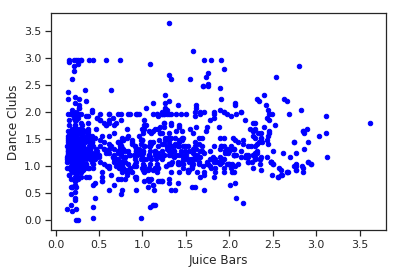

In [101]:
columns=['User id', 'Art Galleries', 'Dance Clubs', 'Juice Bars', 
              'Restaurants', 'Museums', 'Resorts', 'Parks/Picnic Spots', 
              'Beaches', 'Theaters', 'Religious Institutions']
ax1 = df.plot.scatter(x=3, y=2, c='Blue')

#This might suggest people who gave dance clubs low reveiws, alternately gave 
#juice bars higher review, but probably not the best choice of visualization.

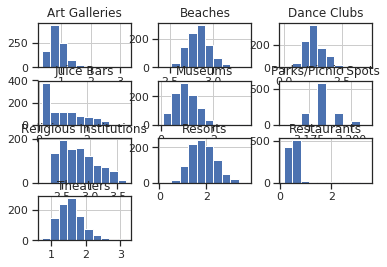

In [102]:
df.hist(grid=True);
#A histogram is not a good choice for visualizing this data.

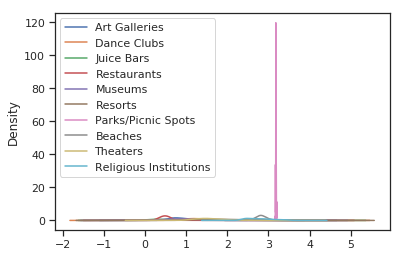

In [97]:
df.plot.density()
# A density plot is also not a good choice to visualize this data.

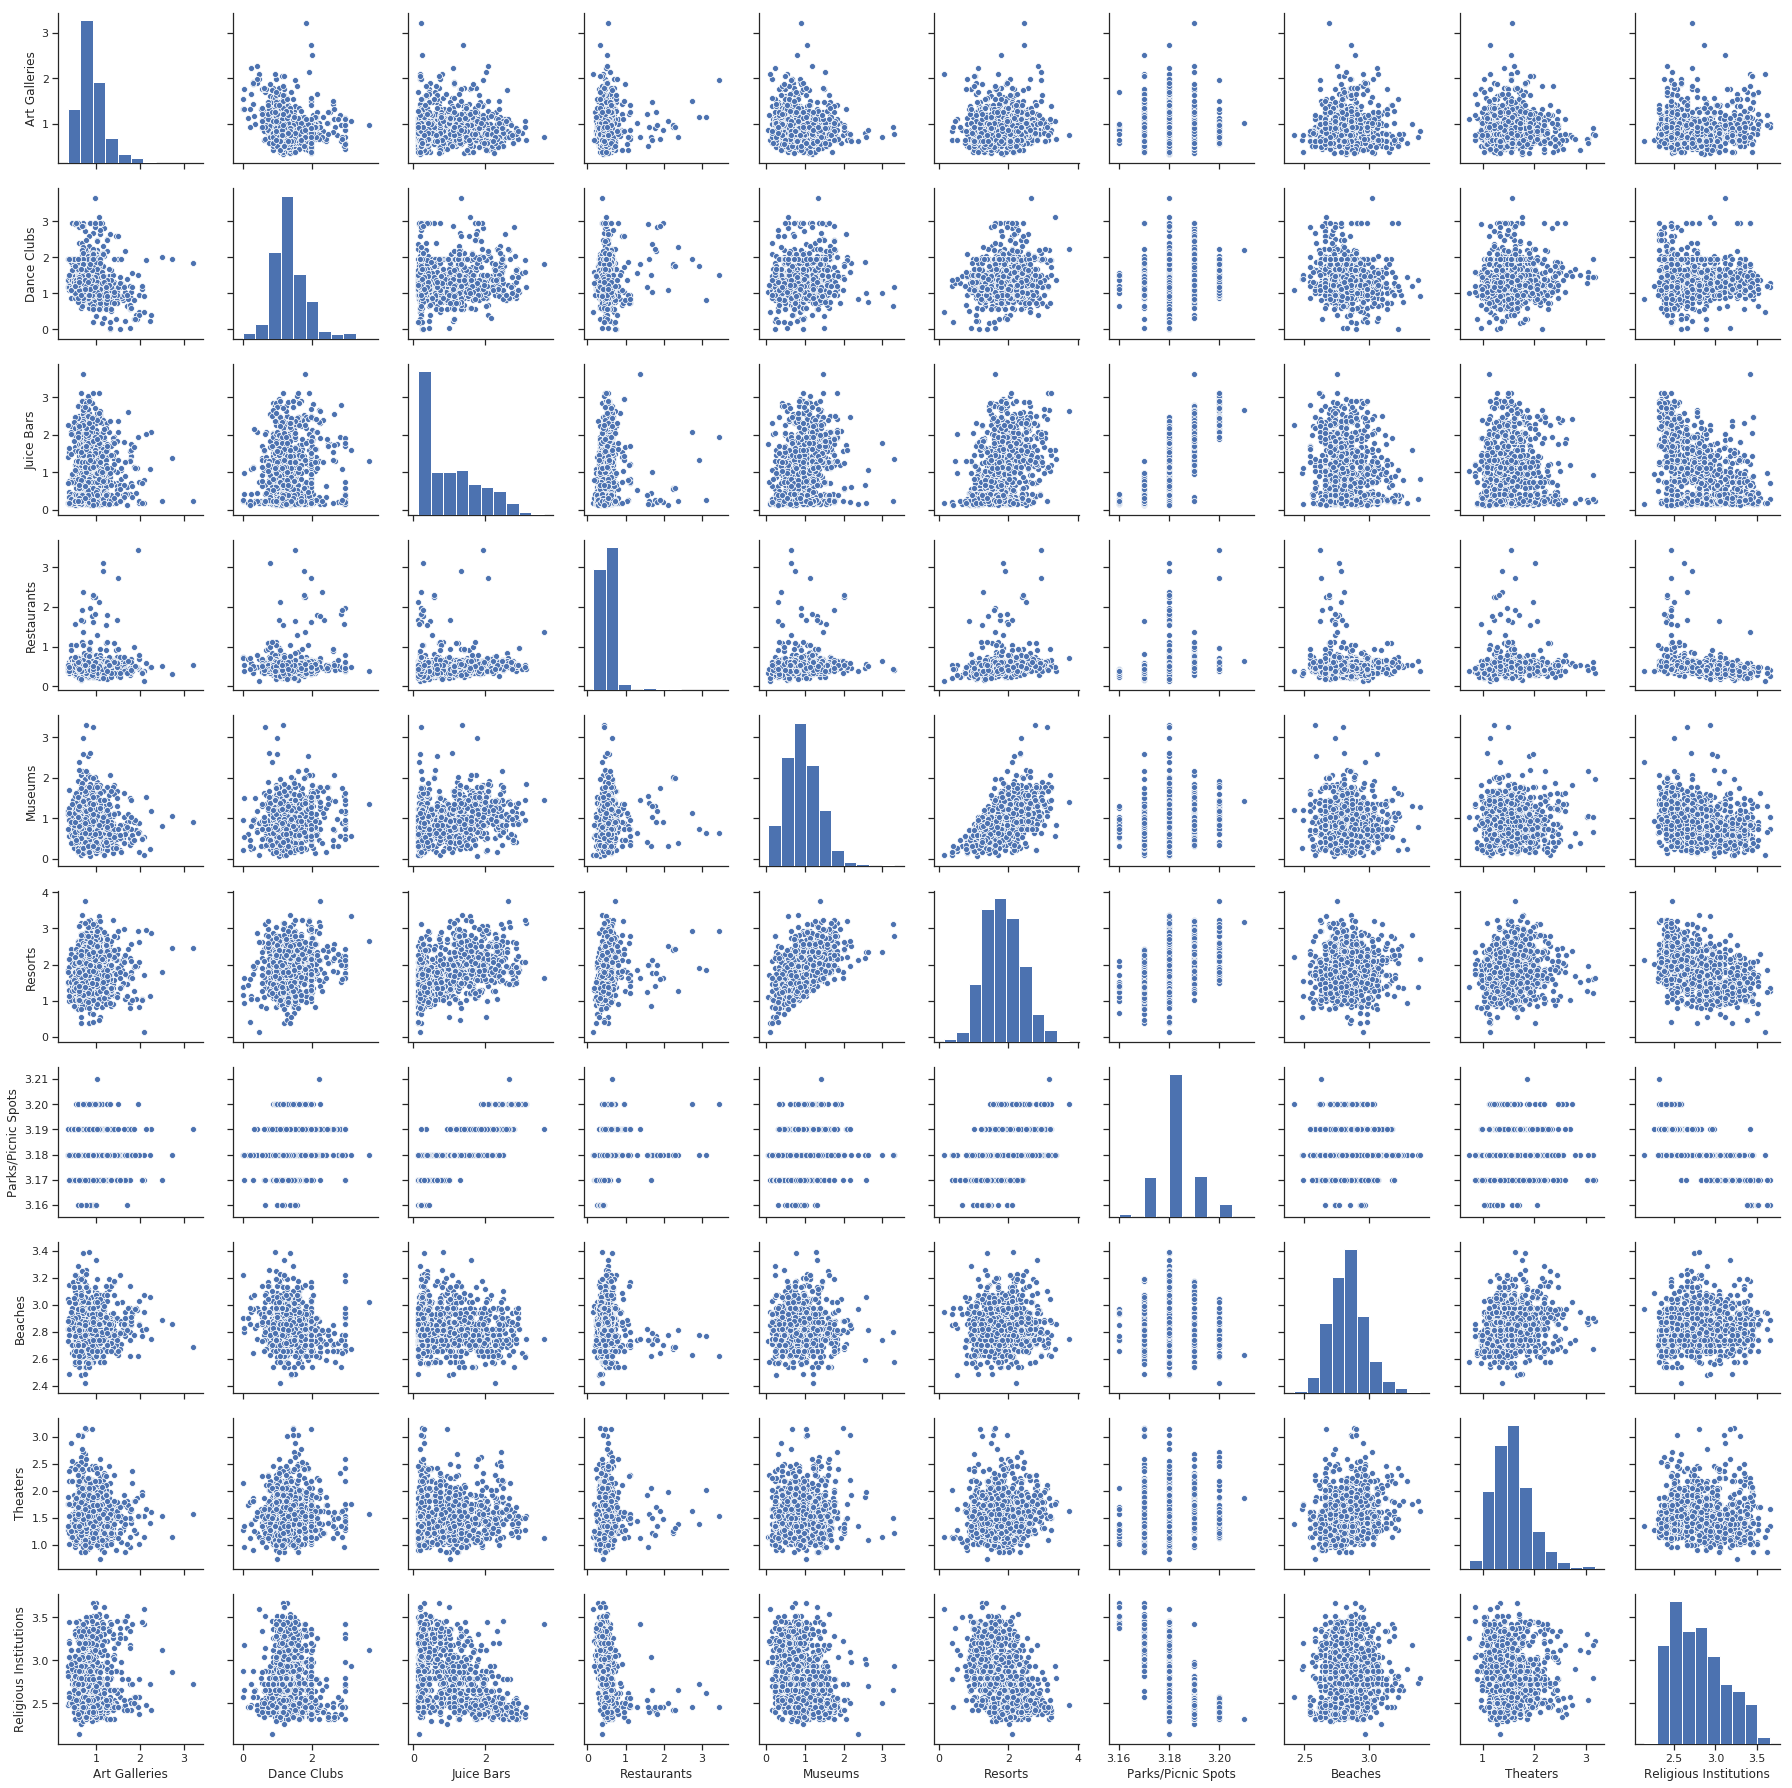

In [98]:
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(df)
# The pair plot is the best way to compare the different columns in the data.

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [110]:
# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")
# Print the status code of the response.
print(response.status_code)
This was as far as I could get, looking forward to learning more in future sprints.

200
